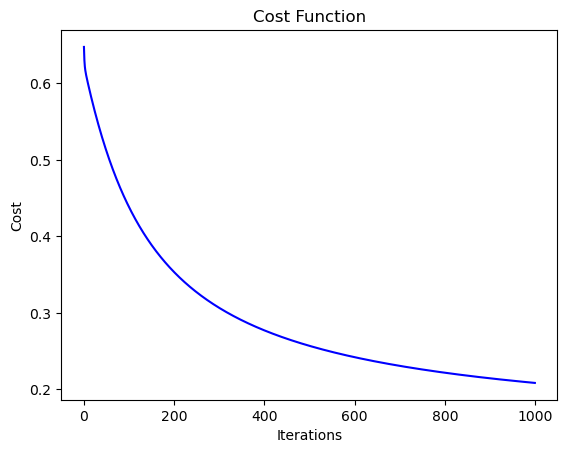

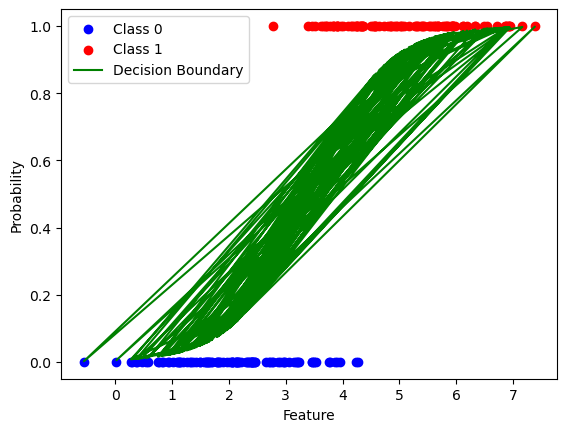

Optimal parameters: [-5.28067971  1.54391856]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
num_points = 100
x1 = np.random.normal(2, 1, num_points)
x2 = np.random.normal(5, 1, num_points)
x = np.hstack((x1, x2)).reshape(-1, 1)
y = np.hstack((np.zeros(num_points), np.ones(num_points)))

# Shuffle the data
indices = np.random.permutation(x.shape[0])
x = x[indices]
y = y[indices]

# Add intercept term
x = np.hstack((np.ones((x.shape[0], 1)), x))

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(theta, x, y):
    m = len(y)
    h = sigmoid(x.dot(theta))
    cost = -1/m * (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h)))
    return cost

# Gradient descent function
def gradient_descent(x, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        gradient = 1/m * x.T.dot(sigmoid(x.dot(theta)) - y)
        theta -= learning_rate * gradient
        cost_history.append(compute_cost(theta, x, y))

    return theta, cost_history

# Initialize parameters
theta = np.zeros(x.shape[1])
learning_rate = 0.1
iterations = 1000

# Run gradient descent
theta, cost_history = gradient_descent(x, y, theta, learning_rate, iterations)

# Plot the cost function
plt.plot(range(iterations), cost_history, 'b')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function')
plt.show()

# Plot decision boundary
plt.scatter(x[y == 0][:, 1], y[y == 0], c='b', label='Class 0')
plt.scatter(x[y == 1][:, 1], y[y == 1], c='r', label='Class 1')
plt.plot(x[:, 1], sigmoid(x.dot(theta)), 'g', label='Decision Boundary')
plt.xlabel('Feature')
plt.ylabel('Probability')
plt.legend()
plt.show()

print('Optimal parameters:', theta)


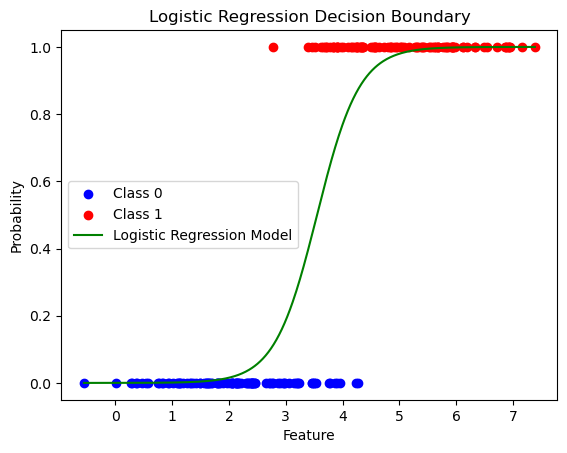

Intercept: [-9.50063111]
Coefficient: [[2.67644807]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(0)
num_points = 100
x1 = np.random.normal(2, 1, num_points)
x2 = np.random.normal(5, 1, num_points)
x = np.hstack((x1, x2)).reshape(-1, 1)
y = np.hstack((np.zeros(num_points), np.ones(num_points)))

# Shuffle the data
indices = np.random.permutation(x.shape[0])
x = x[indices]
y = y[indices]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Create logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Predict probabilities
x_values = np.linspace(x.min(), x.max(), 500).reshape(-1, 1)
y_values = model.predict_proba(x_values)[:, 1]

# Plot decision boundary
plt.scatter(x[y == 0], y[y == 0], c='b', label='Class 0')
plt.scatter(x[y == 1], y[y == 1], c='r', label='Class 1')
plt.plot(x_values, y_values, 'g', label='Logistic Regression Model')
plt.xlabel('Feature')
plt.ylabel('Probability')
plt.legend()
plt.title('Logistic Regression Decision Boundary')
plt.show()

# Print model parameters
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)


In [11]:
x_train.shape

(160, 1)